In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
working_dir = r'../../../outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Total Persons

In [4]:
df = load_data('person_type')
df.groupby('source').sum()[['psexpfac']].T

source,model,survey
psexpfac,"4,040,013","4,049,874"


# Total Households

In [5]:
df = load_data('household_size_vehs_workers')
df.groupby('source').sum()[['hhexpfac']].T

source,model,survey
hhexpfac,"1,605,263","1,655,733"


# Total Trips

In [6]:
df = load_data('trip_purpose_mode')
df.groupby('source').sum()[['trexpfac']].T

source,model,survey
trexpfac,"16,371,975","19,741,592"


# Total Tours

In [7]:
df = load_data('tour_purpose_mode')
df.groupby('source').sum()[['toexpfac']].T

source,model,survey
toexpfac,"16,371,975","33,422,749"


## Average Household Size

In [8]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('household_size_vehs_workers')
pd.DataFrame(
    df.groupby('source').apply(
        lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
        columns=['avg_hh_size'])

,avg_hh_size
source,
model,2.52
survey,2.45


## Average Trips per Person

## Average Distance to Work

In [9]:
df = load_data('trip_averages')
df[df['dpurp'] == 'Work'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       5.11     34.06      0.00
           survey      4.02     26.82      0.00
HOV2       model       8.89     20.33      0.00
           survey      6.67     16.18      1.54
HOV3+      model       9.15     20.65      0.00
           survey      7.74     17.20      1.73
SOV        model       9.16     21.15      0.00
           survey      8.21     18.01      1.71
School Bus model       3.67     11.44      0.00
           survey      3.59     10.13      0.72
TNC        model       2.26     10.09      0.00
           survey      4.57     14.99      0.98
Transit    model       9.87     40.95      0.00
           survey      4.55     20.42      0.43
Walk       model       0.71     14.13      0.00
           survey      0.85     17.10      0.00

## Average Distance to School

In [10]:
df[df['dpurp'] == 'School'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       3.08     20.46      0.00
           survey      2.57     17.13      0.00
HOV2       model       3.40     10.79      0.00
           survey      3.58     10.61      0.72
HOV3+      model       3.61     11.17      0.00
           survey      4.15     11.37      0.83
SOV        model       6.05     15.53      0.00
           survey      6.66     17.00      1.38
School Bus model       3.33     10.77      0.00
           survey      2.74      9.37      0.55
TNC        model       2.47      9.45      0.00
           survey      3.31     13.02      1.02
Transit    model       5.80     37.00      0.00
           survey      3.67     20.99      0.71
Walk       model       1.39     27.75      0.00
           survey      0.89     17.94      0.00

## Transit Pass Ownership

In [11]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('parking_transit_pass')
pd.pivot_table(df, index='ptpass',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
ptpass,,
0,"3,243,800","3,263,799"
1,"796,213","786,074"


In [12]:
pd.pivot_table(df[df['ptpass']==1], 
               index='pptyp',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
pptyp,,
Child Age 5-15,"1,699","9,796"
Full-Time Worker,"467,945","709,022"
High School Student Age 16+,"168,979","5,549"
Non-Working Adult Age 65+,341,nan
Non-Working Adult Age <65,"20,287",329
Part-Time Worker,"45,217","44,097"
University Student,"91,745","15,414"


# Auto Ownership
## By Income

In [13]:
df = load_data('auto_ownership')

# Define income groups
inc_bin=[-1,20000,40000,60000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-60k','$60-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'

pd.pivot_table(df, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
0      model   54,822   24,159   12,489    3,480  19,331
       survey  64,043   27,901   17,279      nan  20,465
1      model  118,911  111,314   90,971   31,715 170,505
       survey 138,648  102,485  110,809      nan 160,016
2      model   30,227   50,625   67,876   36,045 345,713
       survey  90,154   85,436   77,247      nan 371,615
3      model    7,412   14,617   27,241   15,446 215,374
       survey  46,917   19,832   22,998      nan 177,624
4+     model    2,764    5,566    9,748    5,599 109,650
       survey   9,063      759   13,427      nan  99,015

In [14]:
pd.options.display.float_format = "{:,.2%}".format
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()

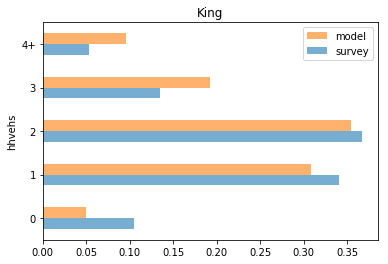

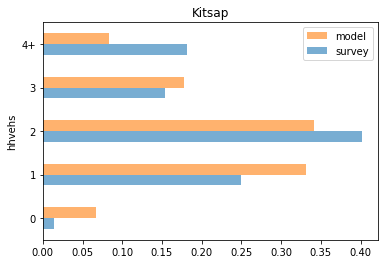

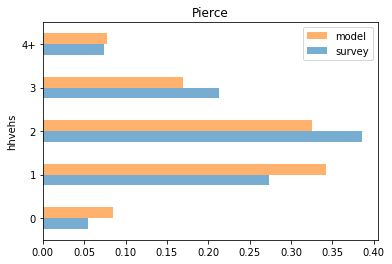

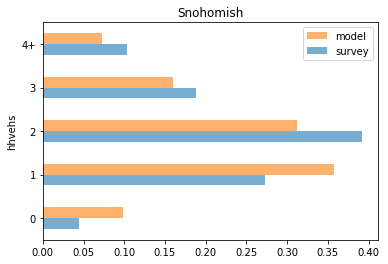

In [15]:
for county in df['hh_county'].unique():
    _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
    _df.columns = ['survey','model']
    _df.plot(kind='barh', title=county, legend='reverse', alpha=0.6)


## Total Workers by Home County
Model

In [16]:
df = load_data('work_flows')
pd.options.display.float_format = '{:0,.0f}'.format
df.rename(columns={'person_county': 'Home County', 'person_work_county':'Work County'}, inplace=True)

pd.pivot_table(df[df['source'] == 'model'], index='Home County', columns='Work County', aggfunc='sum')

psexpfac                         
Work County     King Kitsap  Pierce Snohomish
Home County                                  
King         465,344 31,802  89,380   132,097
Kitsap        15,364 32,993  51,229    89,076
Pierce        48,214 45,212 167,762   203,848
Snohomish     36,075 51,083 126,880   263,155